In [8]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd

In [9]:
url = 'https://en.wikipedia.org/wiki/2023_Karnataka_Legislative_Assembly_election'
res = requests.get(url)

bs1 = bs(res.text, 'html.parser')

In [10]:
cons_tb = bs1.findAll('table', attrs = {'class':'wikitable sortable'})

row_check = 0
cons_result = {}
for tr in cons_tb[0].findAll('tr'):
    row_check += 1
    if row_check <3:
        continue
    td = [x.text.strip() for x in tr.findAll('td')]
    if len(td) == 0:
        continue
    # if len(td) == 12 :
    #     cons_no, cons_name = td[1], td[2]
    # else:
    #     cons_no, cons_name = td[0], td[1]

    if td[0].isnumeric():
        cons_no, cons_name = td[0], td[1]
    else:
        cons_no, cons_name = td[1], td[2]
    cons_result[cons_no] =  cons_name
print(cons_result)
    

{'1': 'Nippani', '2': 'Chikkodi-Sadalga', '3': 'Athani', '4': 'Kagwad', '5': 'Kudachi (SC)', '6': 'Raibag (SC)', '7': 'Hukkeri', '8': 'Arabhavi', '9': 'Gokak', '10': 'Yemkanmardi (ST)', '11': 'Belgaum Uttar', '12': 'Belgaum Dakshin', '13': 'Belgaum Rural', '14': 'Khanapur', '15': 'Kittur', '16': 'Bailhongal', '17': 'Saundatti Yellamma', '18': 'Ramdurg', '19': 'Mudhol (SC)', '20': 'Terdal', '21': 'Jamkhandi', '22': 'Bilgi', '23': 'Badami', '24': 'Bagalkot', '25': 'Hungund', '26': 'Muddebihal', '27': 'Devar Hippargi', '28': 'Basavana Bagevadi', '29': 'Babaleshwar', '30': 'Bijapur City', '31': 'Nagathan (SC)', '32': 'Indi', '33': 'Sindagi', '34': 'Afzalpur', '35': 'Jevargi', '36': 'Shorapur (ST)', '37': 'Shahapur', '38': 'Yadgir', '39': 'Gurmitkal', '40': 'Chittapur (SC)', '41': 'Sedam', '42': 'Chincholi (SC)', '43': 'Gulbarga Rural (SC)', '44': 'Gulbarga Dakshin', '45': 'Gulbarga Uttar', '46': 'Aland', '47': 'Basavakalyan', '48': 'Humnabad', '49': 'Bidar South', '50': 'Bidar', '51': 'Bha

In [18]:

def get_votes_in_order(vote):
    count_dt = list(vote.keys())
    count_dt =[int(x) for x in count_dt]        # convert all values in list to integer
    count_dt.sort(reverse=True)
    count_dt =[str(x) for x in count_dt]         # converting all values in list to string
    return {i:votes_count[i] for i in count_dt[:5]}
   
    
    
#with open('election_data.csv','w') as f:
    f.write('cons no,cons name,1st party,count 1,2nd party,count 2,3rd party,count 3,4th patry,count 4,5th party,count 5,winning patry')
    
    for cons_no, cons_name in cons_result.items():
        votes_count ={}
        url1 = f'https://results.eci.gov.in/ResultAcGenMay2023/ConstituencywiseS10{cons_no}.htm?ac={cons_no}'
    
        r = requests.get(url1)
        bs2 = bs(r.text, 'html.parser')
        
        data_tb = bs2.findAll("table", attrs = {"cellpadding" :"5"})
        if len(data_tb) == 0:
            continue
        
        row_content = data_tb[0].findAll('tr', attrs ={"style":"font-size:12px;"})
        if len(row_content) == 0:
            continue
        
        for tr in row_content:
            td = [x.text for x in tr.findAll('td')]
            party = td[2].replace(',','')
            votes = td[-2]
            if votes not in votes_count:
                votes_count[votes] = party
            else:
                votes_count[votes] += f'##{party}'
        result_data = get_votes_in_order(votes_count)
        #print(result_data)
        res_lst = f'{cons_no},{cons_name},' +  ','.join([f"{result_data[x]},{x}" for x in result_data]) + f",{list(result_data.values())[0]}"
        #print(res_lst)
        ###f.write("\n%s"%(res_lst))
print('Done')


Done


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('election_data.csv')
df.head(2)

,cons no,cons name,1st party,count 1,2nd party,count 2,3rd party,count 3,4th patry,count 4,5th party,count 5,winning patry
0,1,Nippani,Bharatiya Janata Party,73348,Nationalist Congress Party,66056,Indian National Congress,44107,None of the Above,919,Kalyana Rajya Pragathi Paksha,646,Bharatiya Janata Party
1,2,Chikkodi-Sadalga,Indian National Congress,128349,Bharatiya Janata Party,49840,Bahujan Samaj Party,1284,None of the Above,957,Janata Dal (Secular),702,Indian National Congress


Enter the constitution Number:  98


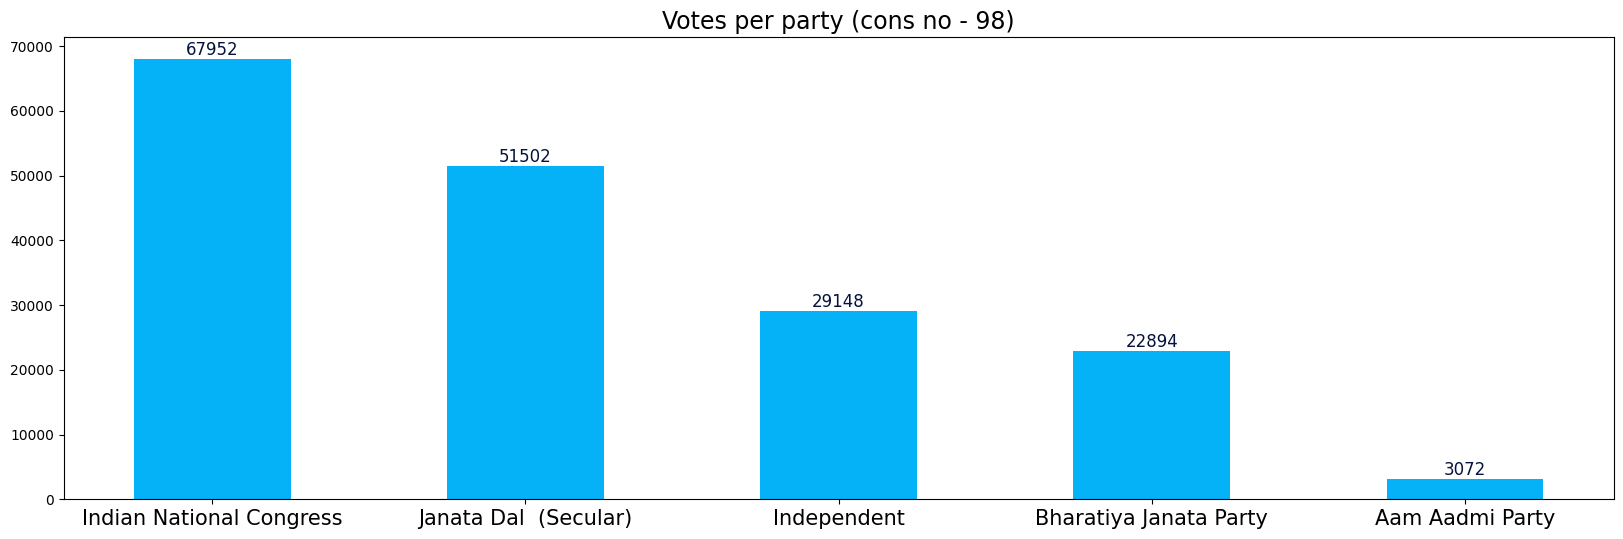

In [111]:
try:
    inp = input('Enter the constitution Number: ')
    if int(inp) > len(df):
        print('Enter the correct constitution number!!')
except:
    print('Enter the valid number!!')

data =df[df['cons no'] == int(inp)].reset_index(drop = 'index')
data = [data[i][0] for i in data.columns][2:-1]

x = [data[i] for i in range(0,len(data),2)]
y = [data[i] for i in range(1,len(data),2)]

plt.figure(figsize = (20,6))
bars = plt.bar(x,y, color = '#05B1F7',width = 0.5 )
plt.title(f'Votes per party (cons no - {inp})', size = '17')
plt.xticks(size = '15', rotation = 0)

for bar in bars:
    yht = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 , yht, round(yht, 2), ha = 'center' , va = 'bottom', size = '12', color = '#04133D')

plt.show()




    